In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab
pylab.rcParams['figure.figsize'] = (22.0, 11.0)
import matplotlib.pyplot as plt
import scipy as sp
import glob
import statsmodels.api as sm

In [24]:
prefx = 'trouble3' # prefix for the gw calibration you want to analyze

# load the gw calibration parameters used
#gw1 = np.load('./Comocreek/barnhatb/out/cal/'+prefx+'gw1.npy')
#gw2 = np.load('./Comocreek/barnhatb/out/cal/'+prefx+'gw2.npy')

In [25]:
obs = pd.read_csv('./Comocreek/barnhatb/obs/como_discharge_real_clean.csv', sep=',', header='infer')              

In [26]:
obs.index = pd.date_range(start='2004-01-01',freq='D', periods = len(obs.q_liter_per_day))

In [27]:
obs.head()

,year,doy,q_liter_per_day
2004-01-01,2004,1,259200
2004-01-02,2004,2,259200
2004-01-03,2004,3,259200
2004-01-04,2004,4,259200
2004-01-05,2004,5,259200


In [28]:
obs.tail()

,year,doy,q_liter_per_day
2011-12-27,2011,361,259200
2011-12-28,2011,362,259200
2011-12-29,2011,363,259200
2011-12-30,2011,364,259200
2011-12-31,2011,365,259200


In [29]:
obs = obs.drop(['year','doy'], axis = 1)

In [30]:
obs.describe()

,q_liter_per_day
count,2679.000000
mean,3132224.067156
std,6593512.058582
min,10970.630440
25%,259200.000000
50%,259200.000000
75%,1975357.367500
max,46573636.970000


# Convert Observed Streamflow from L/d to mm/m$^2$/day

In [31]:
streamflow = obs.q_liter_per_day*0.001 # streamflow in m^3/d

In [32]:
area = 50920259.342719 # m^2 area upstream of the gauge

In [33]:
streamflow = streamflow/area # streamflow in m/d

In [34]:
obs['discharge'] = streamflow*1000.0 # convert to mm3/d/area

In [35]:
del streamflow

In [36]:
obs2 = obs.groupby(lambda x: x.year).sum() # generate yearly sums

obstrain = obs2.discharge[[2004,2005,2007,2009,2011]] # pull out the training years of observations

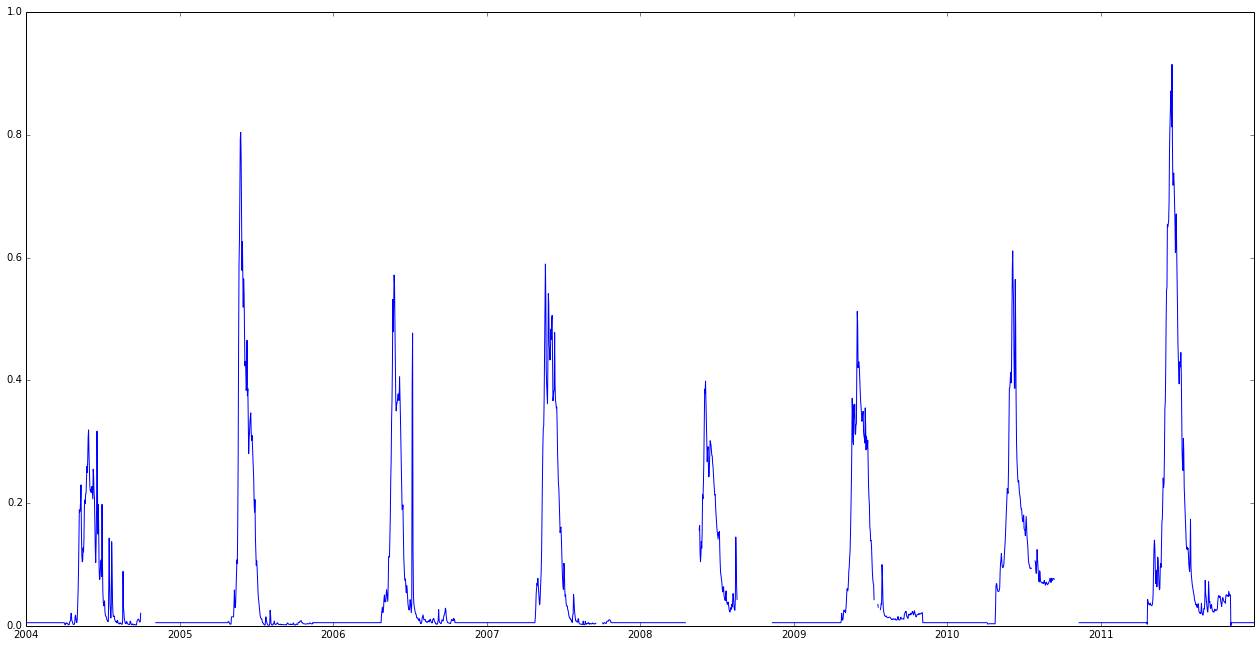

In [37]:
plt.plot_date(obs.index, obs.discharge, 'b-')
plt.show()

## Loop through each model run and calculate an objective function

In [38]:
from hydro import objective_fxns as ofx

In [39]:
path = './Comocreek/barnhatb/out/'+prefx
files = path+'_basin.daily'

print path
print files

./Comocreek/barnhatb/out/trouble3
./Comocreek/barnhatb/out/trouble3_basin.daily


In [40]:
data1 = pd.read_table(files,delim_whitespace=True,
                   header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo')

In [20]:
data2 = pd.read_table(files[1],delim_whitespace=True,
                   header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo')

In [21]:
data3 = pd.read_table(files[2],delim_whitespace=True,
                   header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo')

In [22]:
area = 4186300 # m^2 Area of the simulated basin

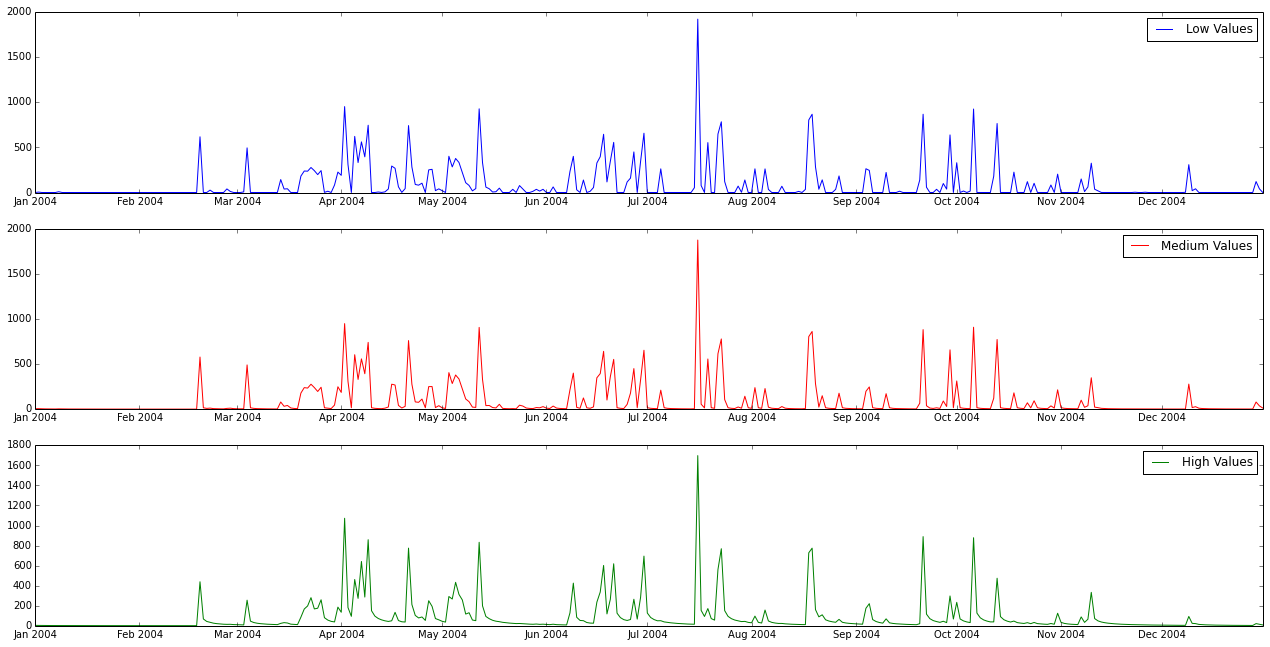

In [24]:
plt.subplot(3,1,1)
plt.plot(data1.index, data1.streamflow, 'b-')
plt.legend(['Low Values'])
plt.subplot(3,1,2)
plt.plot(data2.index, data2.streamflow, 'r-')
plt.legend(['Medium Values'])
plt.subplot(3,1,3)
plt.plot(data3.index, data3.streamflow, 'g-')
plt.legend(['High Values'])

The high values look the best, however, they are super high compared to the observed streamflow.

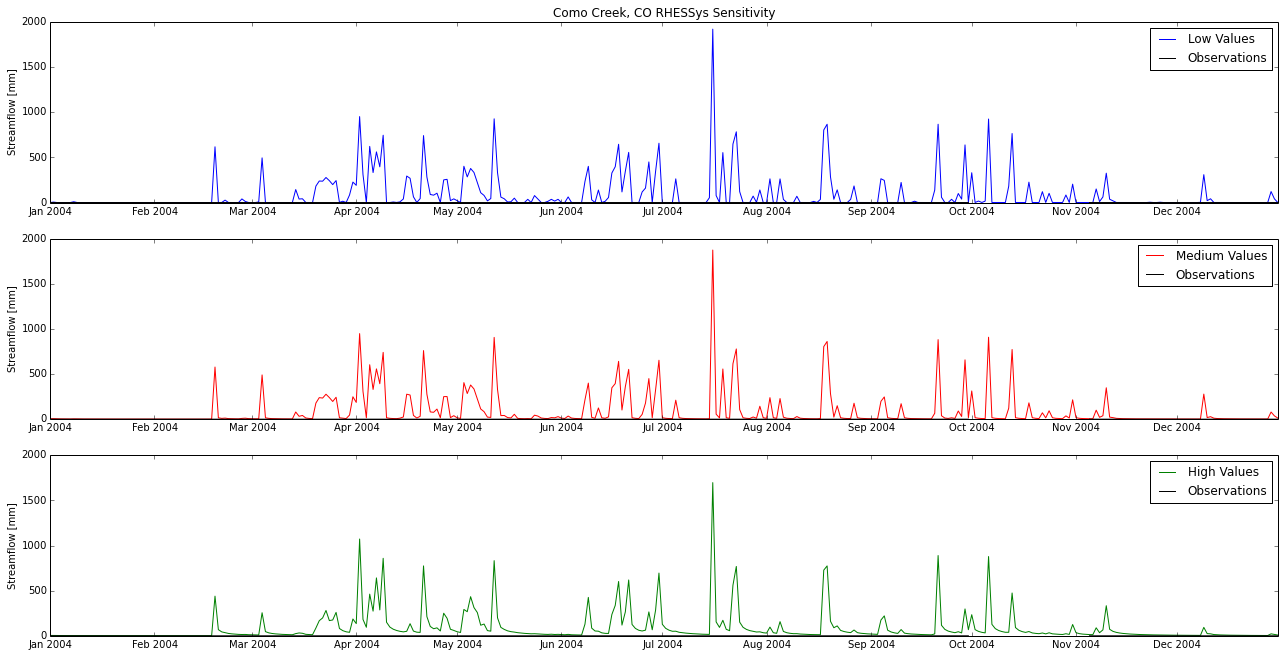

In [71]:
ylab = 'Streamflow [mm]'

plt.subplot(3,1,1)
p1 = plt.plot(data1.index, data1.streamflow, 'b-', obs['2004'].index, obs['2004'].discharge, 'k-')
plt.legend(['Low Values','Observations'])
plt.ylim([0,2000])
plt.title('Como Creek, CO RHESSys Sensitivity')
plt.ylabel(ylab)
plt.subplot(3,1,2)
plt.plot(data2.index, data2.streamflow, 'r-', obs['2004'].index, obs['2004'].discharge, 'k-')
plt.ylim([0,2000])
plt.legend(['Medium Values','Observations'])
plt.ylabel(ylab)
plt.subplot(3,1,3)
plt.plot(data3.index, data3.streamflow, 'g-', obs['2004'].index, obs['2004'].discharge, 'k-')
plt.ylim([0,2000])
plt.legend(['High Values', 'Observations'])
plt.ylabel(ylab)

plt.savefig('./Comocreek/barnhatb/figures/como_rhessys_sensitivity.pdf', width = 8, height = 6, bbox_in = 'tight')

The observed discharge is much too small!

# Plot the observed discharge in mm

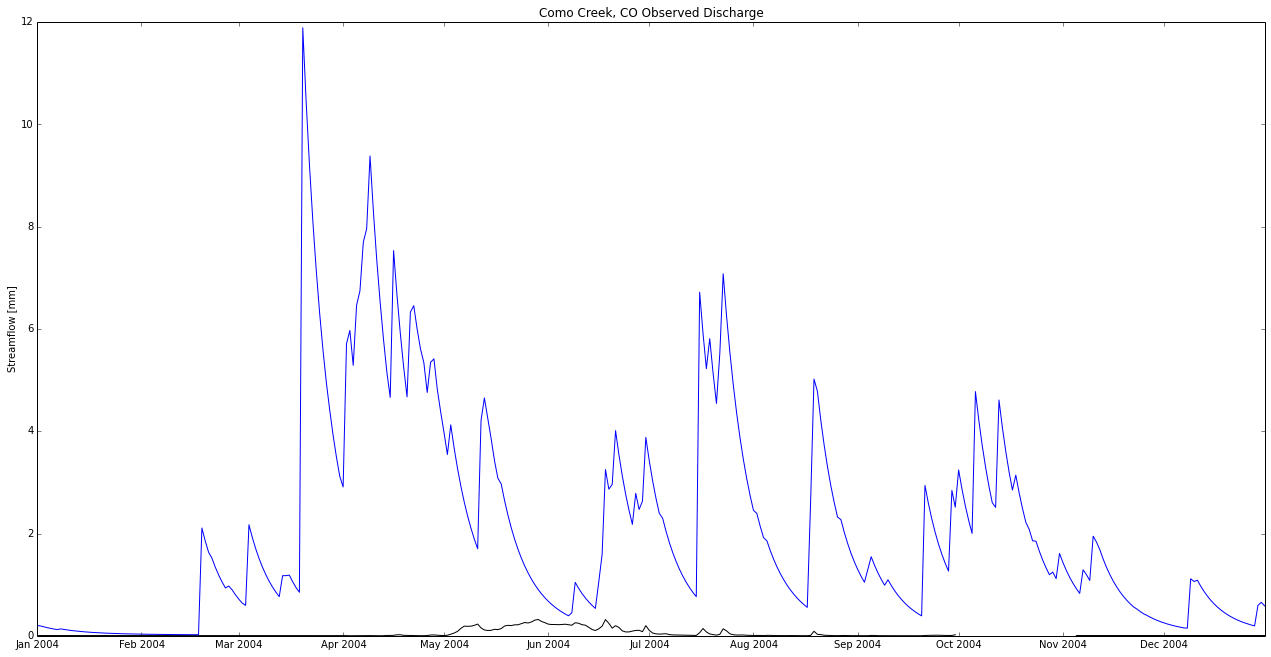

In [41]:
year = '2004'
plt.plot(obs[year].index, obs[year].discharge, 'k-', data1.index, data1.streamflow, 'b-')
plt.title('Como Creek, CO Observed Discharge')
plt.ylabel('Streamflow [mm]')
plt.savefig('./Comocreek/barnhatb/figures/como_obs.pdf', width = 8, height = 4, bbox_in = 'tight')

# Plot Precipitation for 2004

In [42]:
snotel = pd.read_pickle('./Comocreek/barnhatb/clim/niwot_snotel.pcl')
snotel.describe()

,swe,precip_accum,ATmax,ATmin,ATave,precip
count,12321.000000,12321.000000,9034.000000,9034.000000,9034.000000,12321.000000
mean,4.278865,15.432278,9.502558,-4.235635,35.301638,0.002224
std,5.060075,10.555857,9.993307,7.470492,14.393919,0.004892
min,0.000000,0.000000,-22.777778,-47.777778,-13.000000,0.000000
25%,0.000000,6.000000,1.666667,-9.444444,25.000000,0.000000
50%,1.900000,14.500000,9.444444,-3.333333,35.000000,0.000000
75%,7.800000,24.500000,17.777778,1.111111,47.000000,0.002540
max,21.100000,41.700000,46.666667,13.888889,67.000000,0.076200


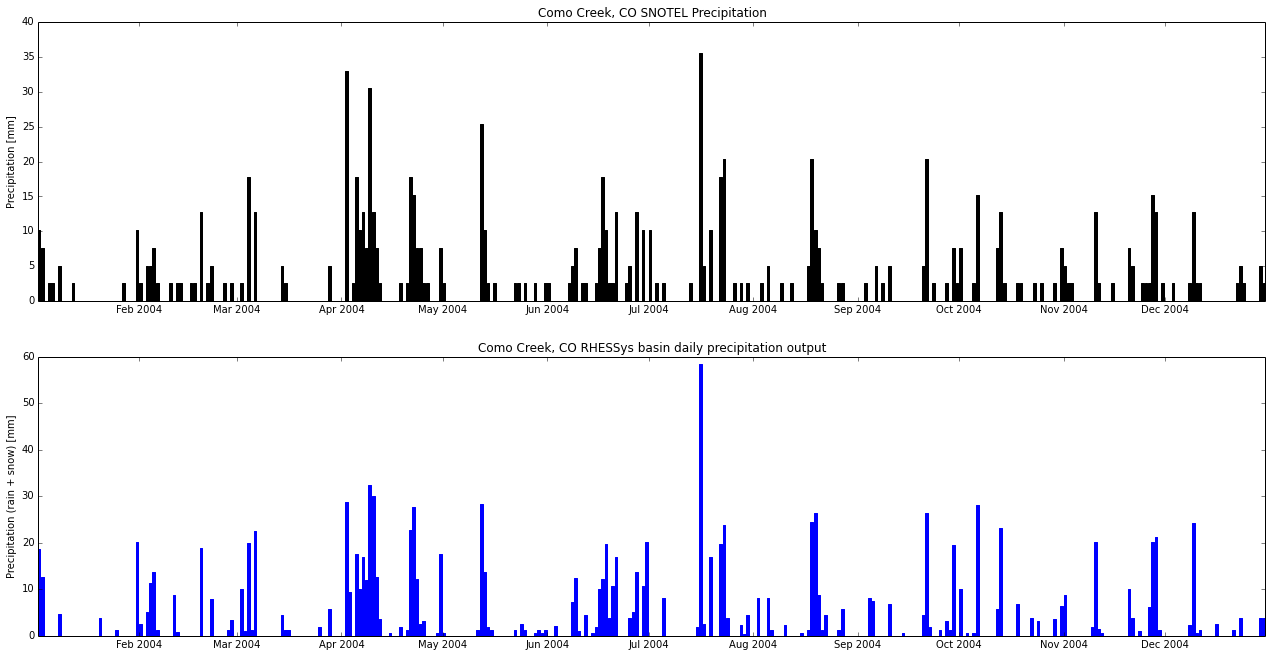

In [43]:
plt.subplot(2,1,1)
plt.bar(snotel[year].index, snotel[year].precip*(100*10),facecolor= 'k')
plt.ylabel("Precipitation [mm]")
plt.title('Como Creek, CO SNOTEL Precipitation')

plt.subplot(2,1,2)
plt.bar(data1.index, data1.precip+data1.snowfall, facecolor = 'b', edgecolor = 'b')
plt.ylabel("Precipitation (rain + snow) [mm]")
plt.title('Como Creek, CO RHESSys basin daily precipitation output')

plt.savefig('./Comocreek/barnhatb/figures/como_rhessys_precip.pdf', width = 8, height = 5, bbox_in = 'tight')

This is way too much rain in the simulation!!!! 

In [60]:
sum_precip = np.sum(snotel[year].precip)*1000
print sum_precip

939.8


In [63]:
sum_discharge = np.sum(obs[year].discharge)
print sum_discharge

13.2502776539


In [62]:
np.sum(data1.precip)+np.sum(data1.snowfall)

40694.011138000002

In [64]:
RR = sum_discharge / sum_precip
print RR

0.0140990398531


In [51]:
data12 = data1.groupby(lambda x: x.year).sum()
data22 = data2.groupby(lambda x: x.year).sum()

data12['ET'] = np.sum([data12.evap, data12.evap])
data22['ET'] = np.sum([data22.evap, data22.evap])

In [63]:
data12.streamflow - (data12.precip+data12.snowfall-data12.ET-data12.snow_subl)

2004   -6506.276366
2005   -3558.866501
2006   -2083.701107
2007   -4625.864830
2008   -4644.748479
2009   -6494.530458
2010   -3152.334221
2011   -6533.142315
dtype: float64

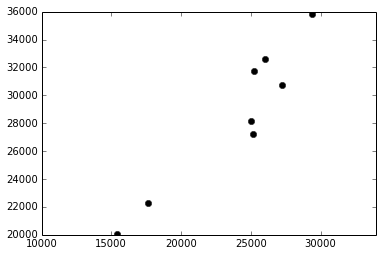

In [62]:
plt.plot(data12.streamflow, (data12.precip+data12.snowfall-data12.ET-data12.snow_subl),'ok')
plt.axis('equal')
plt.show()

In [61]:
m1 = sm.OLS(data12.streamflow, (data12.precip+data12.snowfall-data12.ET-data12.snow_subl))
results = m1.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:             streamflow   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2022.
Date:                Wed, 02 Jul 2014   Prob (F-statistic):           7.03e-10
Time:                        10:05:43   Log-Likelihood:                -69.461
No. Observations:                   8   AIC:                             140.9
Df Residuals:                       7   BIC:                             141.0
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8361      0.019     44.963      0.000         0.792     0.880
Omnibus:                        2.531   Durbin-Watso

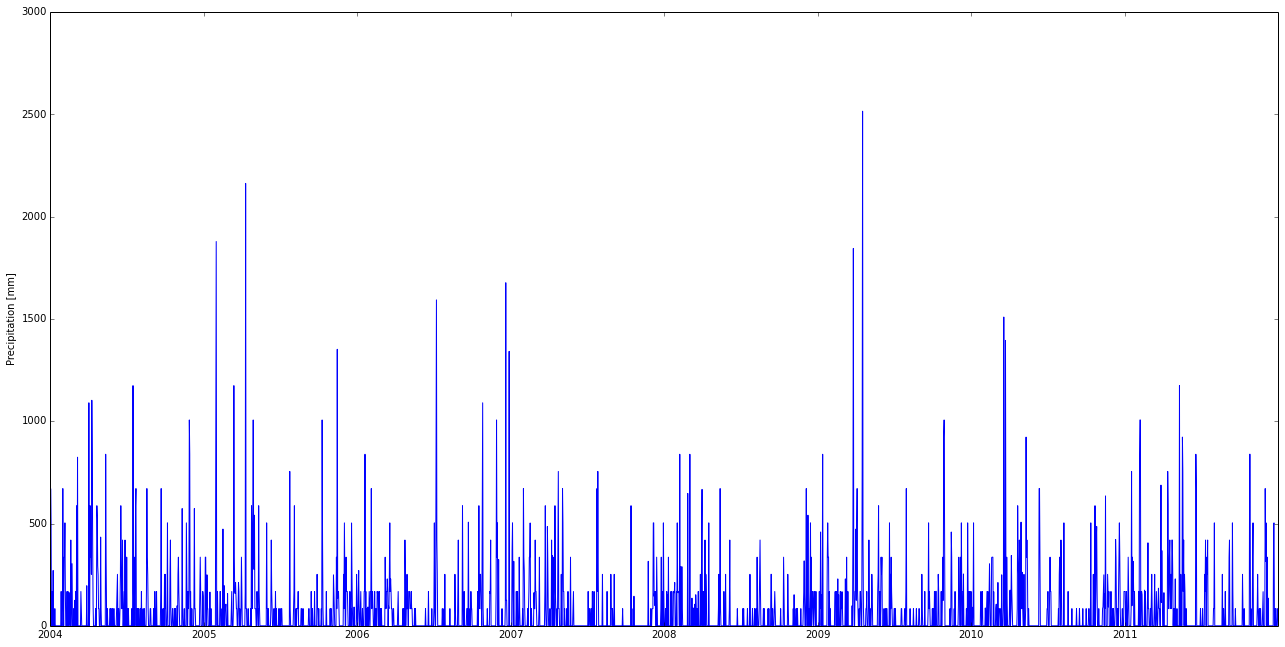

In [71]:
plt.plot(data1.index, data1.snowfall+data1.precip)
plt.ylabel('Precipitation [mm]')

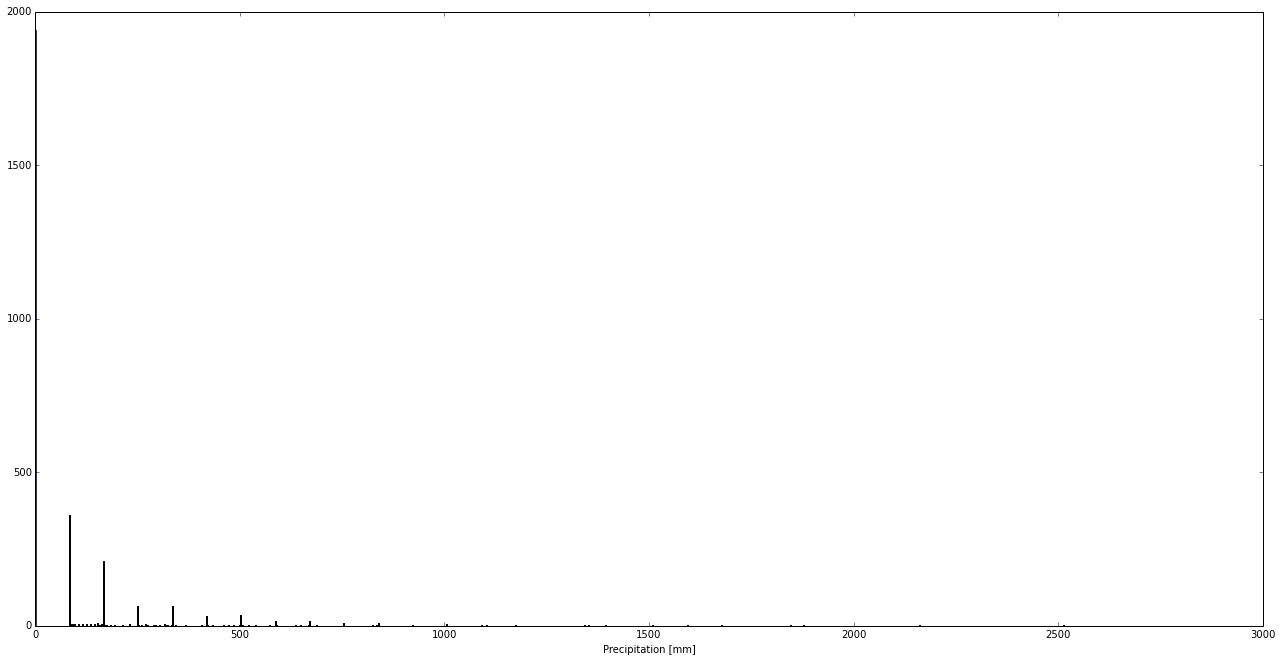

In [75]:
plt.hist(data1.snowfall+data1.precip, bins = 1000)
plt.xlabel('Precipitation [mm]')

In [19]:
objectivefxn = np.zeros([len(files),1])
dischargeyrs = np.zeros([len(files),5])

for fl in files:
    data = pd.read_table(fl,delim_whitespace=True,
                   header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
    num = int(fl.split('_')[1]) # pull out the run number, this will be used to index the objective function result into the objectivefxn matix
    
    streamflow = data.streamflow/(10*100) # convert to m/d
    streamflow = streamflow*area # convert to m3/day
    data['discharge'] = streamflow/(24*60*60) # convert to m3/s
    
    plt.plot_date(data.index, data.discharge, 'k-')
    
    del streamflow
    
    data2 = data.groupby(lambda x: x.year).sum() # compute yearly sums
    
    simtrain = data2.discharge[[2004,2005,2007,2009,2011]]
    
    dischargeyrs[num,:] = simtrain
    
    objectivefxn[num] = ofx.nashsut(obstrain,simtrain)

    #print num
    #print objectivefxn[num]
    #print data2.discharge[2004]
    
    print fl
    
    del data2
    del data
plt.show()

./Comocreek/barnhatb/out/cal/cal2_0_basin.daily
./Comocreek/barnhatb/out/cal/cal2_10_basin.daily
./Comocreek/barnhatb/out/cal/cal2_11_basin.daily
./Comocreek/barnhatb/out/cal/cal2_12_basin.daily
./Comocreek/barnhatb/out/cal/cal2_13_basin.daily
./Comocreek/barnhatb/out/cal/cal2_14_basin.daily
./Comocreek/barnhatb/out/cal/cal2_15_basin.daily
./Comocreek/barnhatb/out/cal/cal2_16_basin.daily
./Comocreek/barnhatb/out/cal/cal2_17_basin.daily
./Comocreek/barnhatb/out/cal/cal2_18_basin.daily
./Comocreek/barnhatb/out/cal/cal2_19_basin.daily
./Comocreek/barnhatb/out/cal/cal2_1_basin.daily
./Comocreek/barnhatb/out/cal/cal2_20_basin.daily
./Comocreek/barnhatb/out/cal/cal2_21_basin.daily
./Comocreek/barnhatb/out/cal/cal2_22_basin.daily
./Comocreek/barnhatb/out/cal/cal2_23_basin.daily
./Comocreek/barnhatb/out/cal/cal2_24_basin.daily
./Comocreek/barnhatb/out/cal/cal2_25_basin.daily
./Comocreek/barnhatb/out/cal/cal2_26_basin.daily
./Comocreek/barnhatb/out/cal/cal2_27_basin.daily
./Comocreek/barnhatb/o

/Users/barnhatb/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


It looks like all of the simulations are exactly the same....m this is troubling, but maybe the ksat is masking the effect of the gw variables. 

In [22]:
plt.plot(simtrain.index, dischargeyrs[0,:],simtrain.index, dischargeyrs[1,:],
         simtrain.index, dischargeyrs[3,:])

plt.show()

In [23]:
simtrain

2004   NaN
2005   NaN
2007   NaN
2009   NaN
2011   NaN
Name: discharge, dtype: float64

In [18]:
nashsut(obstrain,simtrain)

TypeError: 'module' object is not callable

In [57]:
data2

,basinID,pot_surface_infil,snow_thr,sat_def_z,sat_def,rz_storage,unsat_stor,rz_drainage,unsat_drain,cap,evap,snowpack,trans,baseflow,return,streamflow,psn,lai,gw.Qout,gw.storage,
2004,366,30232.099667,0,472813.402286,151300.288736,29094.303353,20811.903450,9738.651655,2465.312114,1.038001,872.776623,397187.555654,0,4671.678222,24681.588275,29353.266506,0,0,0,0,...
2005,365,27861.929283,0,461954.321743,147825.382960,28825.031466,18642.277178,11752.896454,2935.778989,1.324081,615.480629,596458.551448,0,4737.544140,22476.910059,27214.454225,0,0,0,0,...
2006,365,25867.140133,0,480547.183591,153775.098757,28744.422977,20603.948898,9922.186947,2604.270619,2.186790,815.343556,61011.679390,0,4163.636287,20994.854010,25158.490301,0,0,0,0,...
2007,365,18307.588238,0,510889.526590,163484.648505,27152.586615,21064.645064,6839.167062,1667.593239,3.546021,657.554286,37309.071260,0,3369.975896,14272.683586,17642.659487,0,0,0,0,...
2008,366,16023.356923,0,506766.386157,162165.243558,29755.577268,24165.180741,7961.120327,2100.646704,1.665291,616.044308,448612.108654,0,3389.351568,12032.028512,15421.380091,0,0,0,0,...
2009,365,25883.087174,0,479757.536281,153522.411608,28897.071913,20366.220533,10188.459634,2466.471505,1.361740,673.155408,369549.046640,0,4241.773120,20986.845577,25228.618692,0,0,0,0,...
2010,365,25529.207971,0,487843.530953,156109.929905,28122.812383,21378.046981,8911.842876,2231.454229,2.443200,494.094572,433652.771468,0,4192.510100,20807.839731,25000.349839,0,0,0,0,...
2011,365,26542.780343,0,490068.193166,156821.821811,27701.772695,19761.613432,8593.299551,2014.385583,2.635706,469.505108,451326.602489,0,4136.177085,21909.470394,26045.647459,0,0,0,0,...


# Convert Simulated Streamflow from mm/d to m$^3$/s

In [22]:
streamflow = dd.streamflow/(10*100) # convert to m/d

In [23]:
streamflow = streamflow*area # convert to m3/day

In [24]:
dd['discharge'] = streamflow/(24*60*60) # convert to m3/s

In [25]:
del streamflow

# Plot The Data

In [26]:
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

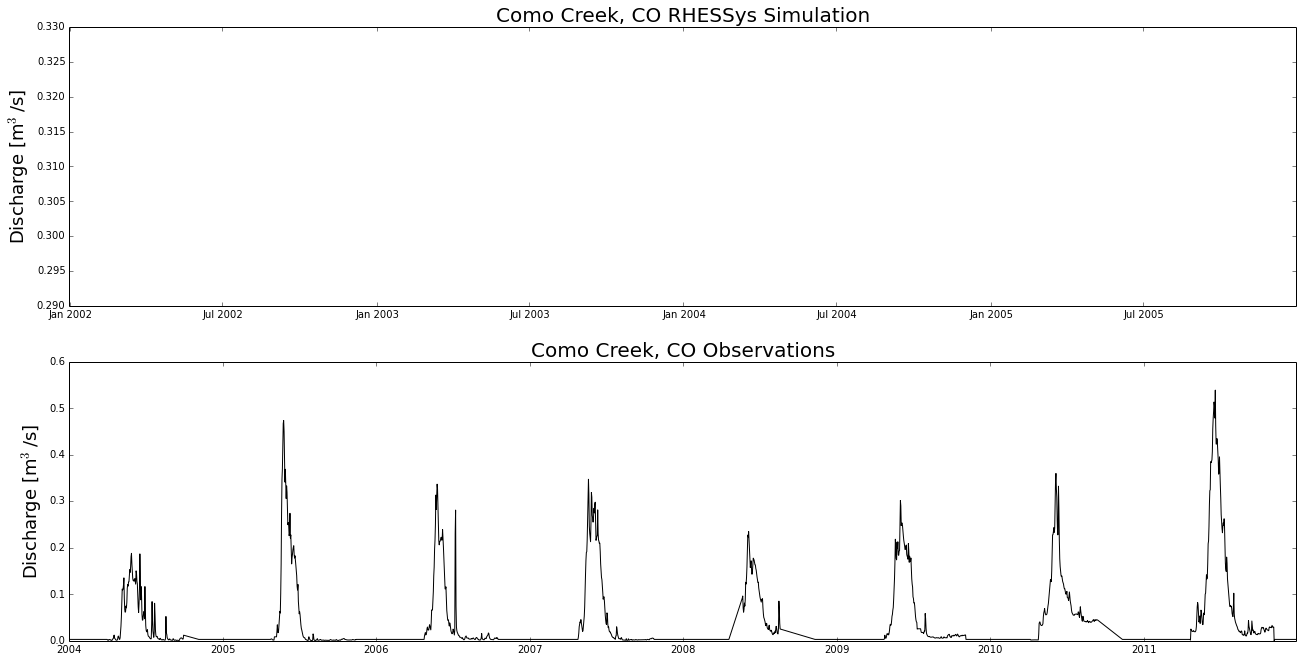

In [27]:
plt.subplot(2,1,1)

p1, = plt.plot(dd.index, dd.discharge, 'b-')
plt.title('Como Creek, CO RHESSys Simulation', fontsize = 20)
plt.ylabel('Discharge [m$^3$/s]', fontsize = 18)

plt.subplot(2,1,2)

p2, = plt.plot(obs.index, obs.discharge, 'k-')
plt.xlim(['2004-01-01','2011-12-30'])
plt.title('Como Creek, CO Observations', fontsize = 20)
plt.ylabel('Discharge [m$^3$/s]', fontsize = 18)

plt.savefig('./Comocreek/barnhatb/figures/trial_2_simualted.png',width = 10, heigh= 6.5)

In [87]:

plt.savefig('./Comocreek/barnhatb/figures/trial_2_obs.png',width = 6, heigh= 5)

# Compute the Nash-Sutcliff

In [65]:
def nashsut(observed,simulated):
    import numpy as np
    import pandas as pd
    
    NSE = 1. - (np.sum((observed - simulated)**2)/
               np.sum((observed - np.mean(observed))**2))
    return NSE

In [66]:
def RMSE(observed,simulated):
    import numpy as np
    import pandas as pd
    
    n = len(observed)
    nn = len(simulated)
    
    if n != nn:
        print 'Observed and simulated data sets are not the same length. Observed: '+str(n)+', Simulated: '+str(nn)
        return None
    del nn
    
    rmse = np.sqrt((1./n)*np.sum((observed-simulated)**2))
    return rmse

In [73]:
obs = obs[obs.index <= '2010-12-30']

In [68]:
nashsut(obs.discharge,dd.discharge)

-20073.032232469221

In [69]:
RMSE(obs.discharge,dd.discharge)

9.1734906893469663

In [78]:
sp.stats.pearsonr(obs.discharge, dd.discharge)

(0.25212227556321165, 2.3483926399397285e-38)

# Compute the water balance!

In [80]:
dd.columns

Index([u'basinID', u'pot_surface_infil', u'snow_thr', u'sat_def_z', u'sat_def', u'rz_storage', u'unsat_stor', u'rz_drainage', u'unsat_drain', u'cap', u'evap', u'snowpack', u'trans', u'baseflow', u'return', u'streamflow', u'psn', u'lai', u'gw.Qout', u'gw.storage', u'detention_store', u'%sat_area', u'litter_store', u'canopy_store', u'%snow_cover', u'snow_subl', u'trans_var', u'acc_trans', u'acctransv_var', u'pet', u'dC13', u'precip', u'mortf', u'tmax', u'tmin', u'snowfall', u'routedstreamflow', u'discharge'], dtype='object')

In [100]:
dd['et'] = np.sum([dd.evap,dd.trans],axis=0)

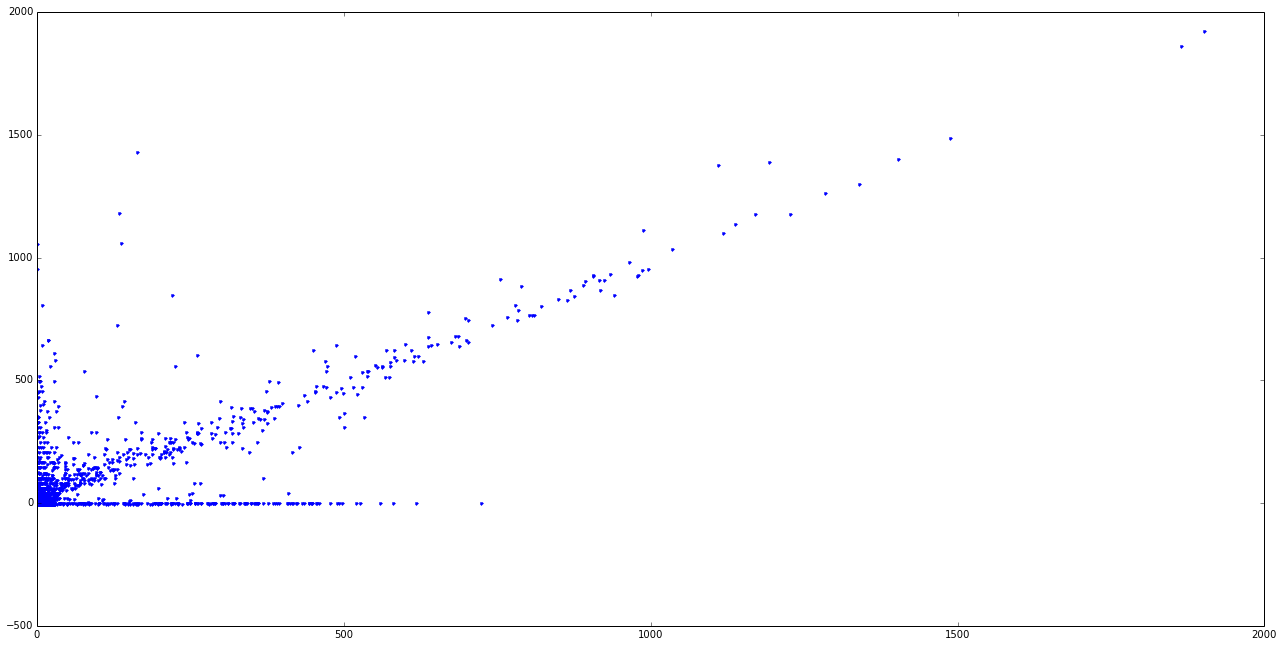

In [104]:
qstar = dd.precip-dd.et
plt.plot(dd.streamflow, qstar, '.b')

In [105]:
ET = dd.et.sum()
Q = dd.streamflow.sum()
P = dd.precip.sum()

Qstar = P-ET

print Q
print Qstar

188131.770223
188733.667525
